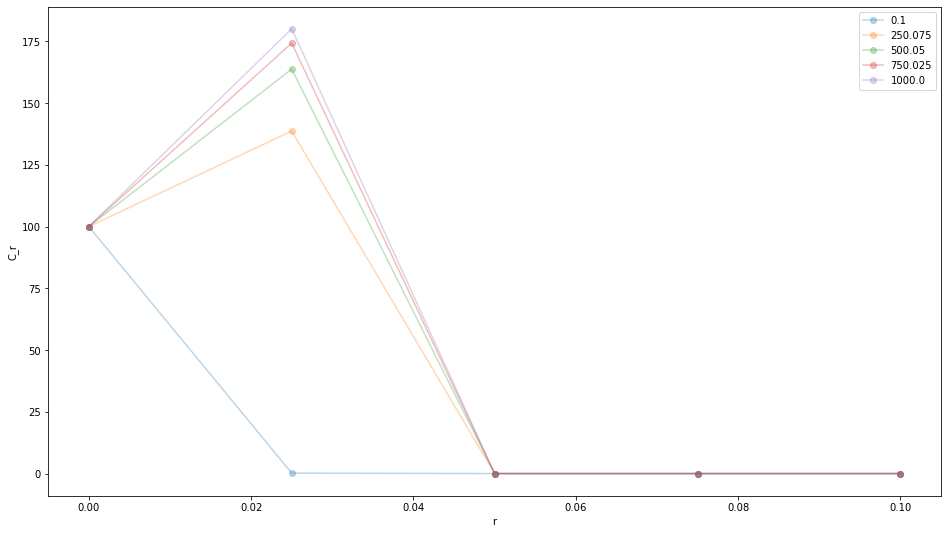

In [96]:
import numpy 
import matplotlib.pyplot as plt
import pandas
import seaborn

n = 5
# i = numpy.linspace(1,5,5)
r, dr = numpy.linspace(1e-10,.1,n, retstep=True)
t = numpy.linspace(.1,1000,5)

AC = numpy.zeros((n,n))
B = numpy.zeros((n,n))
DL = 1.13E-05 #cm^2s^-1

Da = DL   #/(tau (1+ns*bf))

plt.figure(figsize=(16,9))
for dt in t:
    alfa = Da*dt/dr**2
    beta = Da*dt/(r*dr)

    ####Matriz A
    #primero hago toda la diagona com 1+alfa/2
    for i, j in zip(range(AC.shape[0]),range(AC.shape[1])):
        AC[i,j] = 1 + alfa/2   
    #Ahora cambio los extremos de la diagonal
    AC[0,0] = -alfa/2
    AC[-1,-1] = -alfa/2
    #Pongo las dos diagonales laterales con (beta-alfa)/2
    for i, j in zip(range(AC.shape[0]-1),range(AC.shape[1]-1)):
        AC[i, 1+j] = (beta[i+1]-alfa)/2
        AC[i+1, j] = (beta[i]-alfa)/2
    #Corrijo los extremos de esa diagonal lateral
    AC[0,1], AC[-1,-2]= 1 + alfa/2, 1 + alfa/2    
    #por último, pongo el -alfa/2
    AC[0,2], AC[-1,-3]=  -alfa/2, -alfa/2


    # Matriz B
    for i, j in zip(range(B.shape[0]),range(B.shape[1])):
        B[i,j] = 1 - alfa/2   
    #Ahora cambio los extremos de la diagonal
    B[0,0] = alfa/2
    B[-1,-1] = alfa/2
    #Pongo las dos diagonales laterales con (beta-alfa)/2
    for i, j in zip(range(B.shape[0]-1),range(B.shape[1]-1)):
        B[i, 1+j] = (beta[i+1]+alfa)/2
        B[i+1, j] = (beta[i]+alfa)/2
    #Corrijo los extremos de esa diagonal lateral
    B[0,1], B[-1,-2]= 1 - alfa/2, 1 - alfa/2    
    #por último, pongo el -alfa/2
    B[0,2], B[-1,-3]=  alfa/2, alfa/2


    Cr = numpy.zeros((n,1))
    Cr[0] = 100

    L_derecho = B@Cr
    A_inv = numpy.linalg.inv(AC)
    Crtplus = A_inv@L_derecho

#     plt.figure(figsize=(16,9))
    plt.plot(r, Crtplus, 'o-',label= dt, alpha=.3)
#     plt.xlim([0,.01])
    plt.xlabel('r')
    plt.ylabel('C_r')

plt.legend()



    # pandas.DataFrame(B)
    # beta

    # plt.plot(beta)
    # plt.show()

In [13]:

beta

array([           inf, 2.00888889e-05, 1.00444444e-05, 6.69629630e-06,
       5.02222222e-06])